In [13]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans

## Loading Scaled Customer Shopping Data into Pandas

In [14]:
# Load the data into a pandas DataFrame.
customers_shopping_df = pd.read_csv("Resources/customer-shopping-scaled.csv")
customers_shopping_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Method
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,Retail
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,Retail
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,Retail
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,HotelRestCafe
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,Retail


In [15]:
# Use the encodeMethod helper function to encode Hotel/Restuarant/Cafe purchases to 1 and Retail purchases to 2.
def encodeMethod(purchase):
    """
    This function encodes the method of purchases to 1 for "HotelRestCafe"
    and 2 for "Retail".
    """
    if purchase == "HotelRestCafe":
        return 1
    else:
        return 2

In [16]:
# Edit the "Method" column using the encodeMethod function
customers_shopping_df["Method"] = customers_shopping_df["Method"].apply(encodeMethod)

# # Review the DataFrame
customers_shopping_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Method
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2


## Implementing the Elbow Method

In [17]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values to try
k = list(range(1, 11))

In [18]:
# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(customers_shopping_df)
    inertia.append(model.inertia_)

In [19]:
# Create a dictionary with the data to plot the elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,2736.172727
1,2,2383.490513
2,3,1700.594282
3,4,1398.578321
4,5,1100.131058
5,6,1002.051786
6,7,888.644710
7,8,825.545136
8,9,795.310937
9,10,746.977147


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

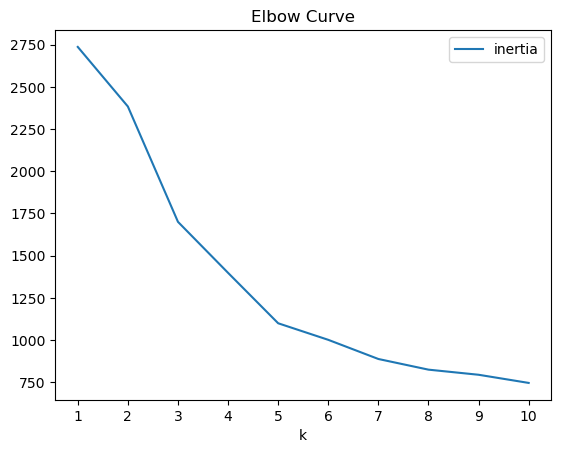

In [20]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [25]:
k = elbow_data["k"]

In [29]:
inertia = elbow_data["inertia"]
inertia

[2736.1727272727267,
 2383.4905134637647,
 1700.5942824393087,
 1398.578321333161,
 1100.1310580777879,
 1002.0517864902049,
 888.6447095259673,
 825.5451356619278,
 795.3109372527545,
 746.9771470273665]

In [21]:
# Determine the rate of decrease between each k value. 
k = elbow_data["k"]
inertia = elbow_data["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 12.89%
Percentage decrease from k=2 to k=3: 28.65%
Percentage decrease from k=3 to k=4: 17.76%
Percentage decrease from k=4 to k=5: 21.34%
Percentage decrease from k=5 to k=6: 8.92%
Percentage decrease from k=6 to k=7: 11.32%
Percentage decrease from k=7 to k=8: 7.10%
Percentage decrease from k=8 to k=9: 3.66%
Percentage decrease from k=9 to k=10: 6.08%


 The rate of decrease in inertia **begins** to slow down between k=3 to k=4, which means that our elbow point is at k=4.

In [22]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

# Fit the model
model.fit(customers_shopping_df)

# Make predictions
k_4 = model.predict(customers_shopping_df)

# Create a copy of the DataFrame
customers_predictions_df = customers_shopping_df.copy()

# Add a class column with the labels
customers_predictions_df['customer_segment'] = k_4

In [23]:
# Review the DataFrame
customers_predictions_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Method,customer_segment
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2,1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2,3
...,...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1,3
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1,3
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,2,2
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1,1


<Axes: title={'center': 'Scatter Plot by Shopping Segment - k=4'}, xlabel='Frozen', ylabel='Grocery'>

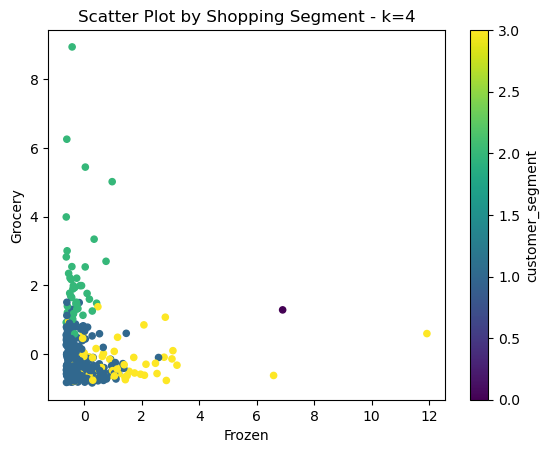

In [24]:
# Create a scatter plot with x="Frozen" and y="Grocery" with k=4 segments
customers_predictions_df.plot.scatter(
    x="Frozen", 
    y="Grocery", 
    c="customer_segment",
    title = "Scatter Plot by Shopping Segment - k=4",
    colormap='viridis'
)